
# Exploratory Data Analysis & Data Visualization for Improving Efficiency


By: [Kemeng Zhang](kemeng_zhang@swissre.com)
Date: April 22th, 2021





<span style="font-family:Papyrus; font-size:1em;">Check the slide by pressing arrow on the navigation panel, click 'esc' to navigate between slides</span>




## 1. EDA: How to explore insights from a "dirty" dataset 

This analysis is using an open sourced dataset of over [Free 7+ Million Global Companies](https://data.world/peopledatalabs/free-7-million-company-dataset) from Linkedin Web Data and aims to explore relevant information regarding relationships among key categories. It is basically divided into four sections: 


- **Introduction**, where the investigation problem is set and the dataset is described; 


- **Data Wrangling**, where the acquired data are cleaned and parsed;


- **Exploratory Data Analysis**,where some patterns are explored and this data is enriched with another Glassdoor data;


- **Conclusion**, where the found insights about the problem are reviewed and communicated.

## 2. Data Visualization: How could we leverage data visualization into the value chain of insurance industry

- **Supply Chain Risk**, whether data visualization can improve supply chain efficiency 


- **Questions to be discussed**, where data visualization added values


In [1]:
from IPython.display import Image
from IPython.display import HTML

## 1. 1 Introduction

This<a name="read"></a> analysis will use the open sourced dataset of over [7+ Million Global Companies](https://data.world/peopledatalabs/free-7-million-company-dataset) 

The analysis focuses on the question of how talent loss (the difference between total employee estimate and current employee estimate) correlates to ratings, different countries especially between developing and developed countries, and finally various industries. The initial dataset is being extracted to answer the question, including a set of key characteristics about the company in each row:
* <span style="color: blue">'name'</span>: tell us which company it is
* <span style="color: blue">'year founded'</span>: tell us which year the company is founded
* <span style="color: blue">'industry'</span>: tell us which industry the company belongs to 
* <span style="color: blue">'size range'</span>: tell us how large in general the company is
* <span style="color: blue">'country'</span>: tell us where the company's headquater is
* <span style="color: blue">'current employee estimate'</span>: tell us how many current employee the company has
* <span style="color: blue">'total employee estimate'</span>: tell us how many total employees the company has 


### 1.1.1 Understanding Data

Load the dataset
```python
df_o = pd.read_csv('companies_sorted 2.csv')
df_o.head(3)
```

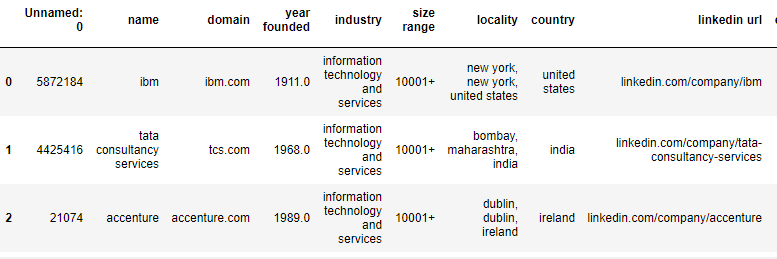

In [2]:
Image(filename = "con_case1_01.png", width=700, height=500)

### 1.1.2 Key Questions 

- **Regarding the year founded:**<a name = "hp"></a> 
    - Which period of years are more companies founded and which years are less?
    
    
- **Regarding the industry:**
     - How is the company data distributed in relation to different industries?
     - How do industries develop around the world? (*trending industry or industry depression*)


- <span style="color:red">Regarding the country:</span>
     - How is the company data distributed in relation to different countries?(*developed v.s. developing countries*)
 
 
- <span style="color:red">Regarding the total/current employee estimate:</span>
     - Do talent loss related to company rating, employee salary, country, or industry?


- **Regarding the data:**
     - Is the data valid? (*enriched by Glassdoor*)
   

### 1.2 Data Wrangling 

 * Handling missing data   
   
 * Handling duplicates
 
 * Handling outliers
 
#### 1.2.1 Handling missing data

According to the null correlation map, missing values from columns like 'name', 'industry' doesn't affect other variables a lot, however, the rest of the columns affect each other, especially missing values from 'country' and 'locality' has a correlation of 0.9. 'year founded' and 'country' has a correlation of 0.4.
   

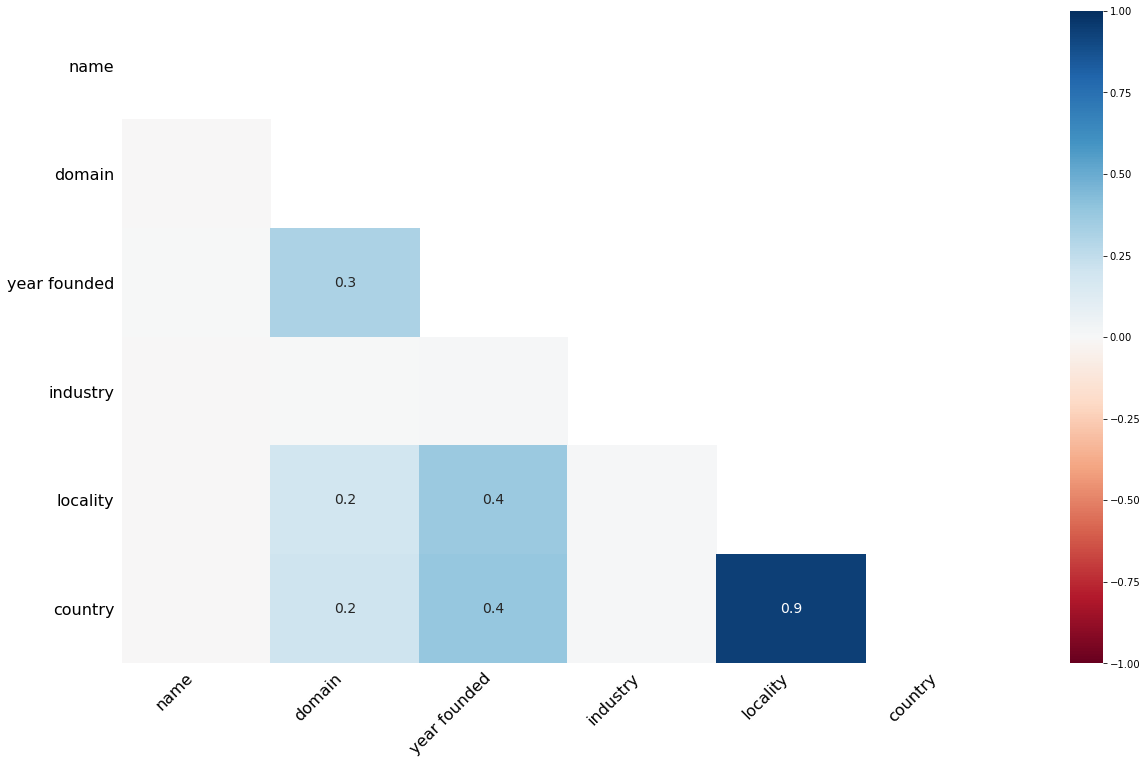

In [3]:
Image(filename = "con_case1_m1.png", width=550, height=550)

**1.2.2 Handling duplicates**
```python
df_y.drop_duplicates(inplace = True)
```
**1.2.3 Handling outliers**
* Since this is a real-world data, it is very important to know how to define outliers. I define outliers as fake facts that are contradictory to common senses like companies founded in the future.
```python
## total/current employee estimate 
df_y[(df_y['total employee estimate'] - df_y['current employee estimate']) < 0]
## year founded
df_y[df_y['year founded'] < 2020]
```
* Since our further analysis is not related to 'name', there is information for other attributes associated with a specific 'name', thus, there are no defined outliers in 'name'. The same applies to 'country' and 'industry'.

**1.2.4 Mapping categorical data to numerical data**
```python
labelEncoder = LabelEncoder()
dfn['industry_mapping'] = LabelEncoder().fit_transform(dfn['industry'])
dfn['country_mapping'] = LabelEncoder().fit_transform(dfn['country'])
```


### 1.3 Exploratory Data Analysis

 * General Relation and basic statistic distribution 
   
 * Time-series analysis along the year founded
 
 * Apply machine learning technique for talent loss prediction

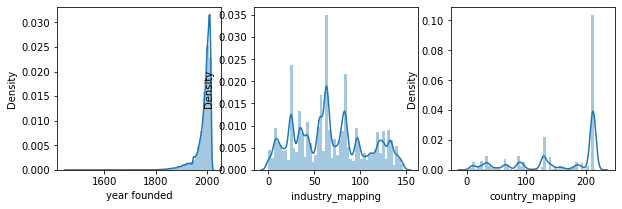

In [19]:
Image(filename = "con_case1_03.png", width=700, height=400)

The plots are not following normal distribution except for industries. 'year founded' and 'country_mapping' are strongly right-skewed which the dataset might bias on some specific countries with more recent founded companies.

**1.3.2 Time-series analysis along the year founded**

In this section I will seek to answer the following questions based on the available data:

- How does the volume of companies for different countries develop along with time? 
- How does the distribution of industry in relation to selected countries?

In order to simplify the computation, I specifcally selected three countries (United States, United Kingdom, and India) to represent three continents for further analysis, selected based on volumes of companies

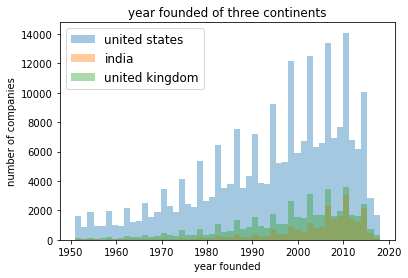

In [25]:
Image(filename = "con_case1_y2.png", width=450, height=450)

In [4]:
HTML('<img src="hist03.gif">')

From the charts above, there is a similar pattern across those three countries with the development of years. Before 2010, the number of companies in all three countries is increasing and after 2010, the numbers drop. There might be interesting potential analysis around the global economy and financial crisis in 2008.

**1.3.3 Comparison of economic development in different countries and industries**

In order to simplify the computation, I specifically selected three countries (United States, United Kingdom, and India) to represent three continents based on volumes of companies and two industries.

```python
## united states
d_us = data[data.country == "united states"]
d_us['Counts'] = d_us.groupby(['year founded'])["country"].transform('count')
## united kingdom
d_uk = data[data.country == "united kingdom"]
d_uk['Counts'] = d_uk.groupby(['year founded'])["country"].transform('count')
## india
d_in = data[data.country == "india"]
d_in['Counts'] = d_in.groupby(['year founded'])["country"].transform('count')

## Insurance Industry
in_d= dfn[dfn.industry == "insurance"]
in_d['Counts'] = in_d.groupby(['year founded'])["industry"].transform('count')
## Information technology and services
it_d= dfn[dfn.industry == "information technology and services"]
it_d['Counts'] = it_d.groupby(['year founded'])["industry"].transform('count')

```


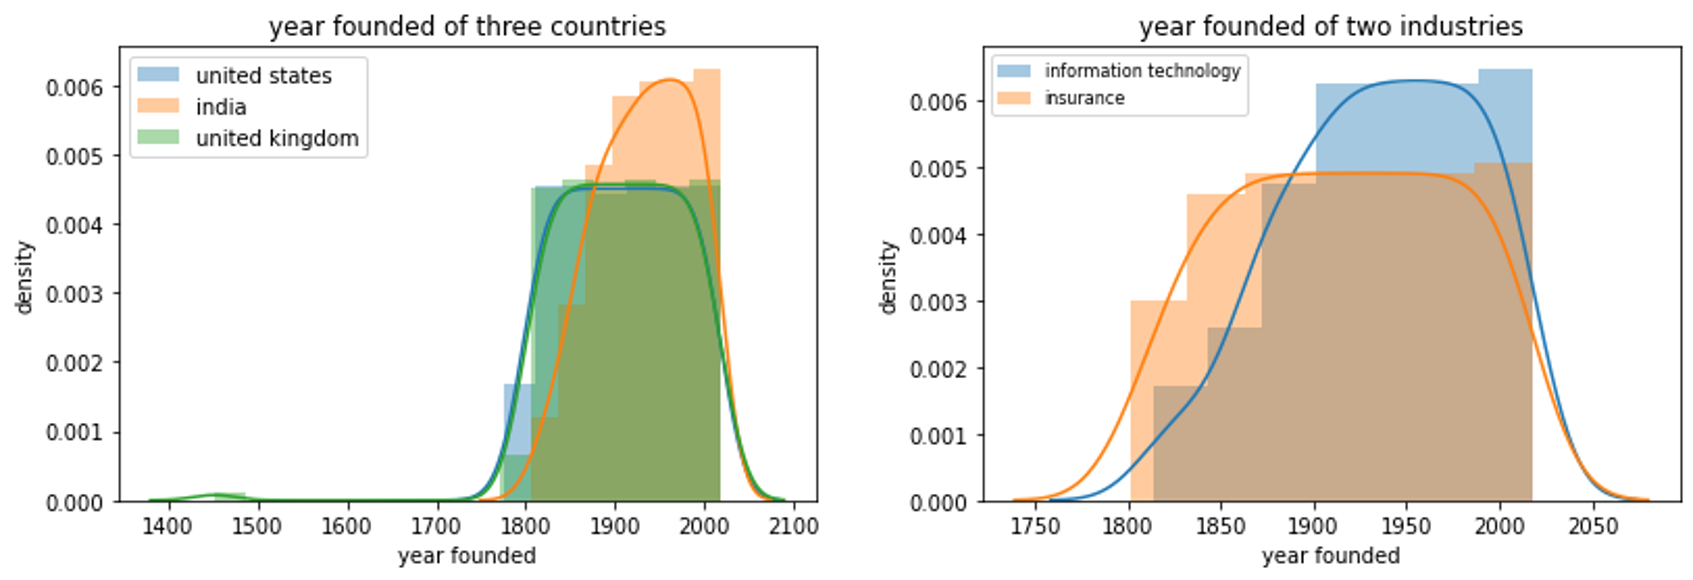

In [27]:
Image(filename = "con_case1_y3.png", width=700, height=450)

From the chart above, we can tell that the US and the UK have companies founded in an earlier time before 1900. However, India has a strong increase regarding development during the last century(the 1900s -2000s), which might indicate that developing countries start economy booming from the last century.

From the chart above, we can tell that the insurance industry is developing earlier than the IT industry starting from 1800, whereas the IT industry starts booming in the late 20th century. **The insurance industry has a rather more stable development than the IT industry.** Some companies might transfer their business along with years like many ealier founded IT companies (< 1850).

### 1.3.4  Prediction on Talent Loss with a dataset from Glassdoor
- What are important attributes of companies that influence talent loss? 
- Do talent loss related to company rating, employee salary, country, or industry?


**Define Talent Loss**
```python
dfn['talent loss'] = (dfn['total employee estimate'] - dfn['current employee estimate'])/dfn['total employee estimate']
get_statistics(dfn['talent loss'])

```
   

**1.3.4.2 Talent Loss per country:**

    From the charts below, I will relate the industry pattern as talent loss in different countries. We can see there are some patterns regarding developing and developed countries.mIn Europe, Spain and France have higher talent loss while Italy, Switzerland and Germany have rather stable development.
```python
## Group by countries and plot in tableu
tl_country = pd.DataFrame(dfn.groupby('country')['talent loss'].mean())
tl_country['std'] = dfn.groupby('country')['talent loss'].std()
```
    
    
    

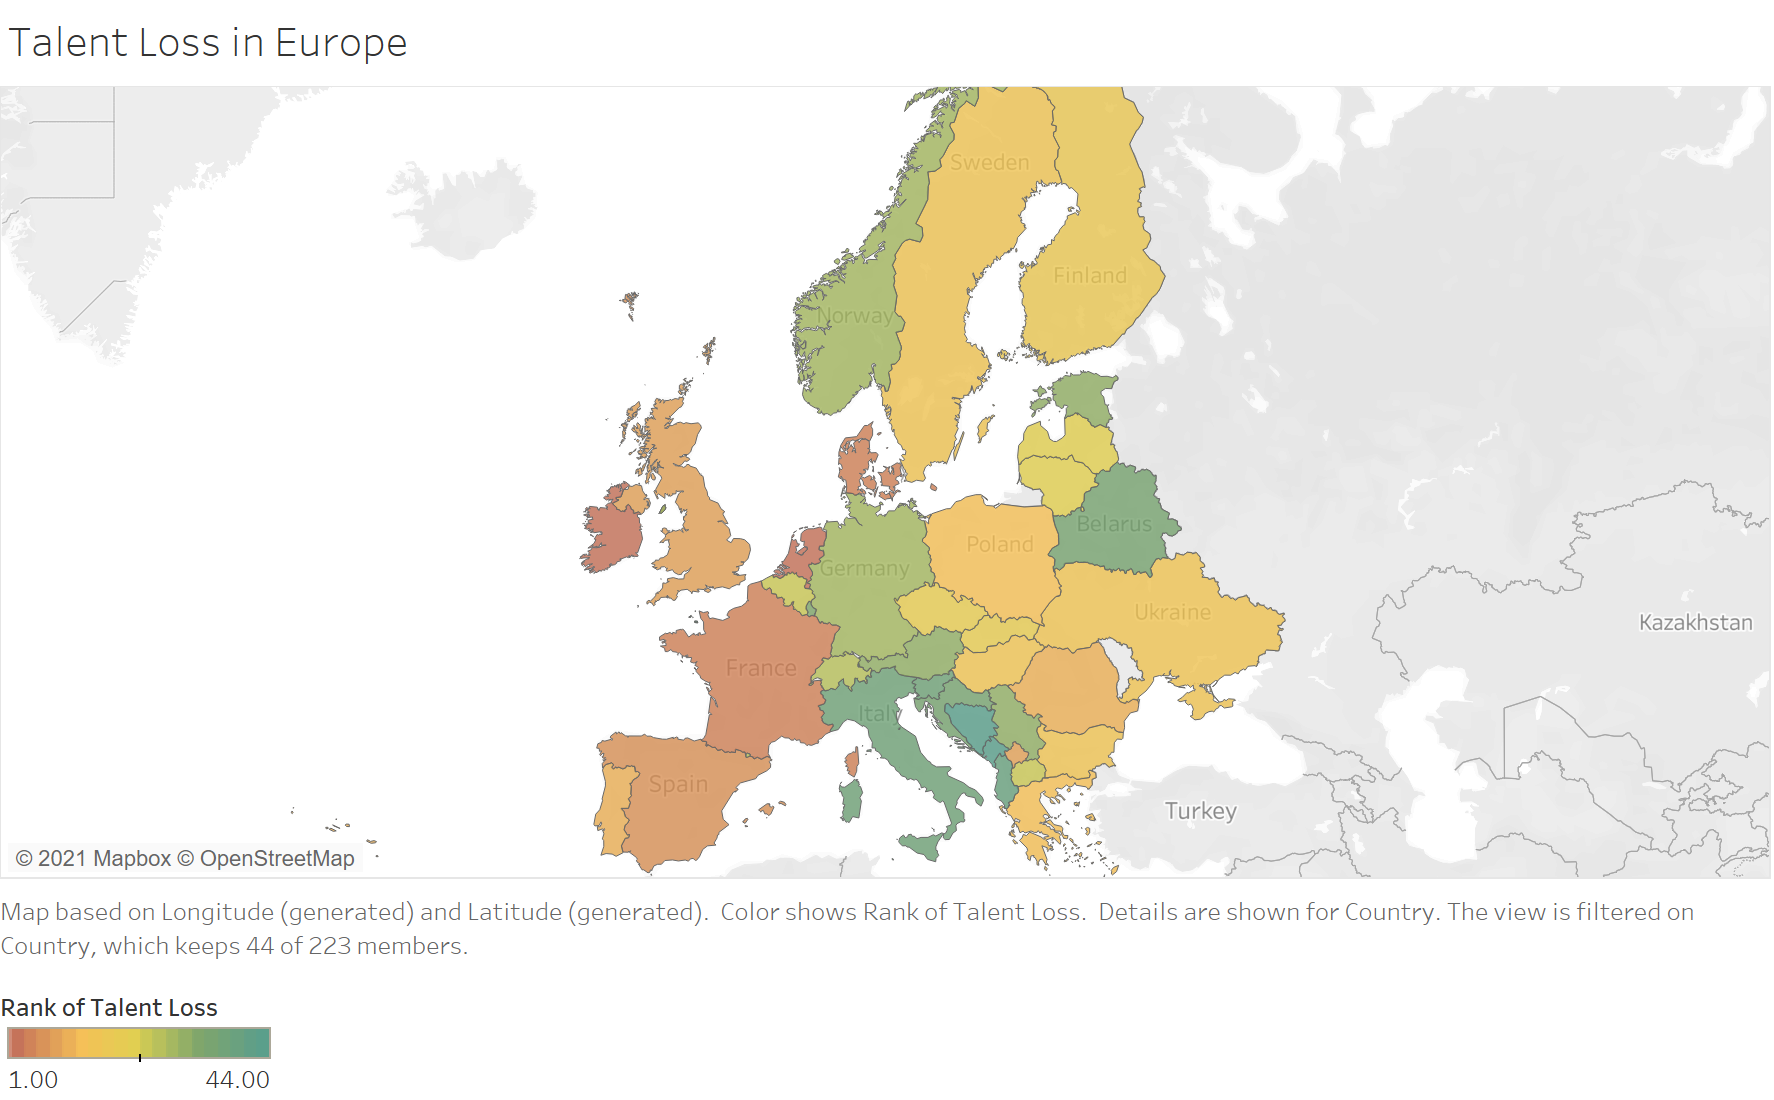

In [9]:
Image(filename = "e1.png", width=800, height=600)

**1.3.4.2 Talent Loss per country:**

    From the chart below, it seems that developed countries might encounter saturation in economy and have generally higher talent loss compared to developing countries in Asia and Africa.
    This might induce the hypothesis that talent loss is related to the location of companies, which we will test out in the later prediction analysis.

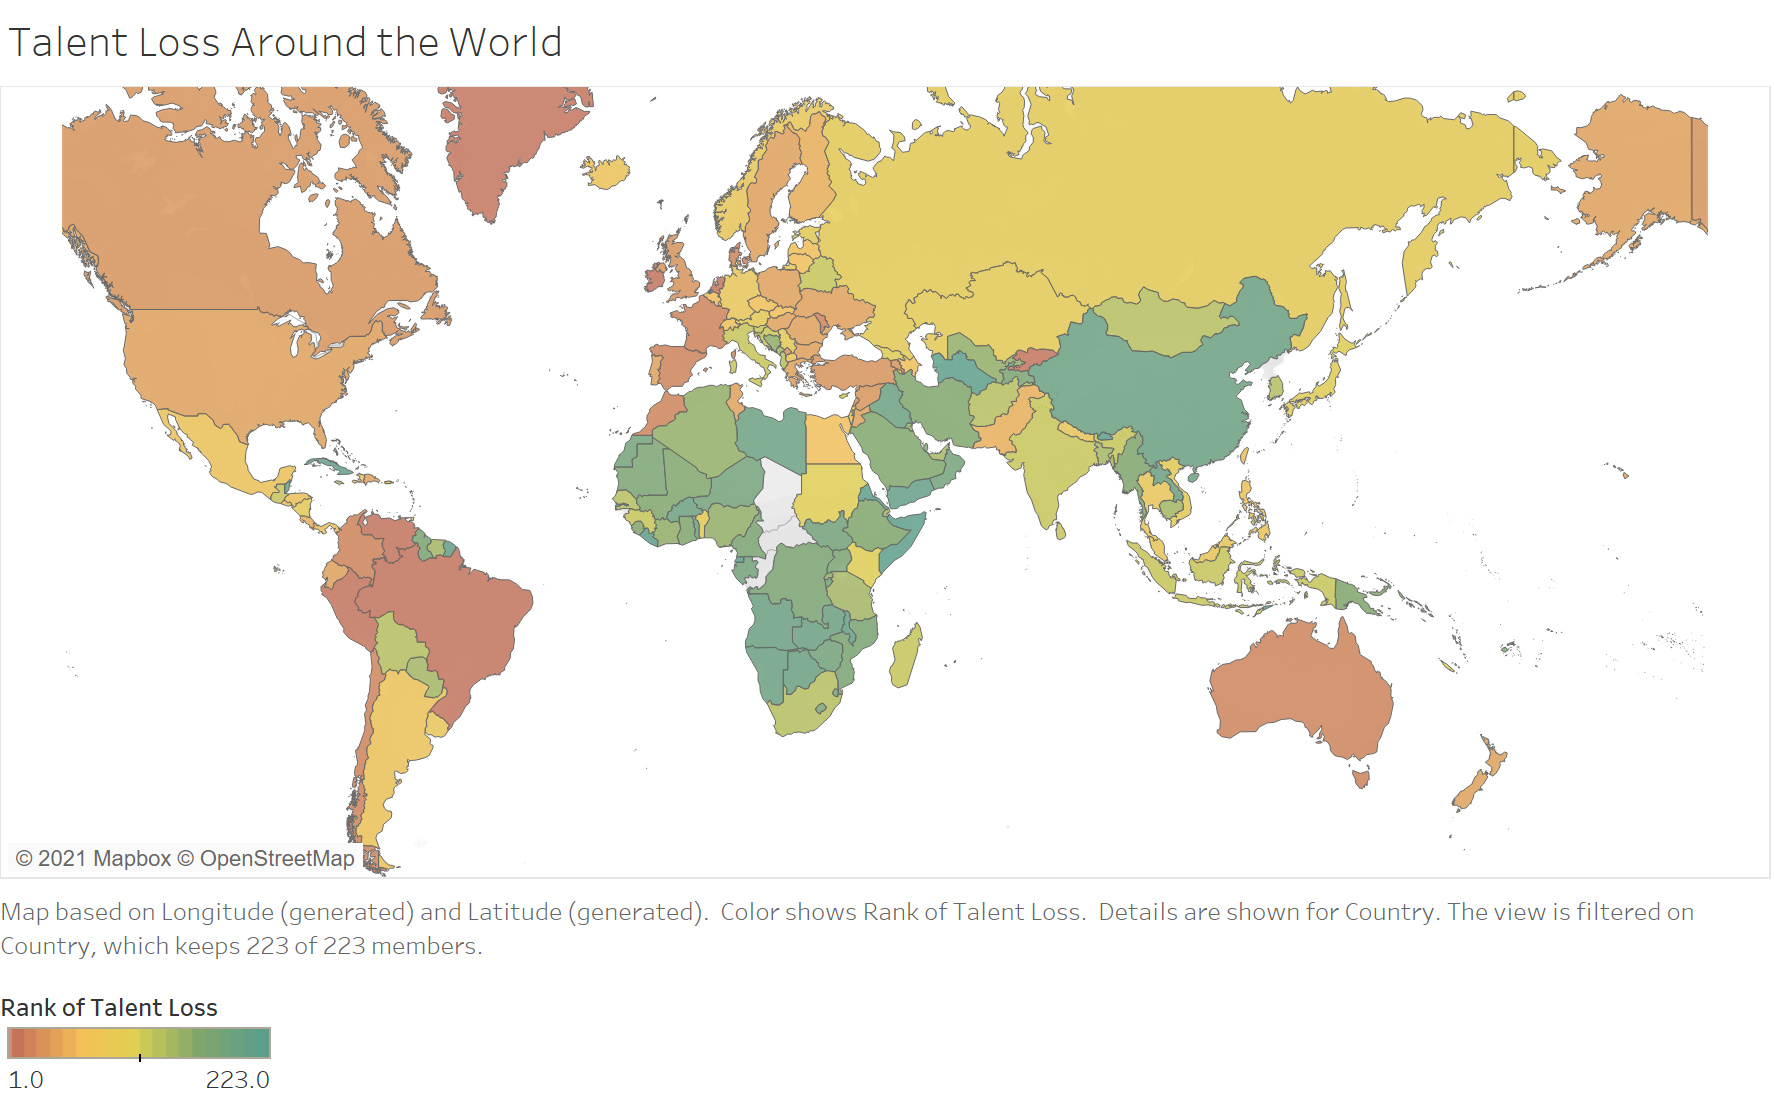

In [10]:
Image(filename = "w1.png", width=700, height=700)

**1.3.4.3  Prediction on Talent Loss with a dataset from Glassdoor**

****The initial Glassdoor dataset**** is being extracted to answer the question, including a set of key characteristics about the company in each row:
* <span style="color: blue">'name'</span>: which company and used to merge with the current dataset 
* <span style="color: blue">'salary'</span>: average employee salary for the company 
* <span style="color: blue">'rating'</span>: average rating for the company
* <span style="color: blue">'numOfrates'</span>: number of rates for the company
    

**Check the correlation of different variables in the combined dataset**

From the heatmap above, we can tell that in general **the talent loss has a negative relationship with rating with a score of "-0.17"**.

```python
#Correlation Matrix
corr = df_lg.corr()
corr = (corr)

```
    

**KMeans Classification**

From the k-means classification chart, we can tell that there are not clear groups in this case. However, there is a slight drop from center 4 to center 5, which indicates that companies get less talent loss when they get a higher rating above 4.5 in Glassdoor.

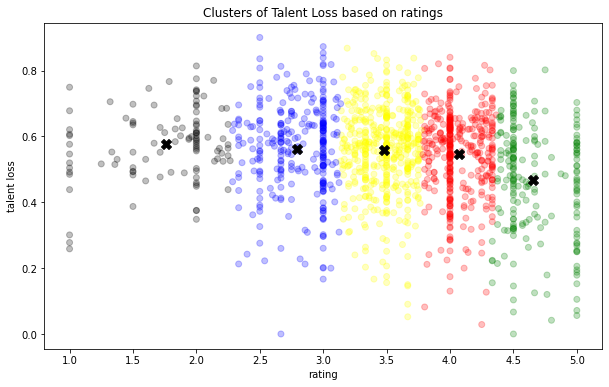

In [13]:
Image(filename = "con_tl_km01.png", width=600, height=600)

### 1.3.5 Ordinary least squares (OLS) regression

In this section, I would like to use OLS regression to build a simple ML model to predict the talent loss (mighe be user retention in iptiQ).

The model including:
* <span style="color: blue">independent variables</span>:
    * rating
    * salary
    * industry_mapping
    * country_mapping
* <span style="color: blue">dependent variable</span>: 
    * talent loss
    
    
  <span style="font-family:Papyrus; font-size:1em;">Check the sub-slide by pressing down arrow on the key board or the navigation panel</span>

#### OLS Regression Results 

| Variables        | coef       | 
| ------------- |:-------------|
| rating      | -0.1810 |
| salary      | 0.0370      |  
| industry_mapping | 0.0859      |
| country_mapping | -0.0192      |
| const | 0.0273      |

we can find the negative coefficiency of rating (**-0.18**) which kind of match the hypothesis that **companies with better rating will have less talent loss**.

R-score | AIC | BIC
--- | --- | ---
0.061 | -1.096e+04 | -1.094e+04

##  1.4 Conclusion for Exploratory Data Analysis

This<a name="end"></a> analysis sought to explore the open-source company dataset, available [here](https://data.world/peopledatalabs/free-7-million-company-dataset), containing more than 100.000, 000  companies around the world.

* <span style="color:red">Additional data might be relevant to the causal  analysis or validity of the dataset besides data from web analytics tools.</span>


* In projects like user acquisition, we probably will encounter similar problems of investigating causes of user loss



* Potential Data project:
    * How company rating/salary affect its growth and employee turnover
    * Which industry is in depression and which ones are growing around the world
    * Which countries have fast-growing companies in the world

# 2. Data Visualization: how could we leverage data visualization into the value chain of insurance industry




- **Supply Chain Risk**, whether data visualization can improve supply chain efficiency 


- **Questions to be discussed**, where data visualization added values





## 2.1 Visualizing and Quantifying Supply Chain Risk
### 2.1.1 Measurement Matrix

We would like to analyze each node's risk and highlight hotspots that management could plan around. The methodology for finding risk probabilities are measured in the followin grisk indexes. 


| Risk Index        | Description     | 
| ------------- |:-------------|
| Risk Exposure Index (REI)     | the revenue-enabled-per-year by that supplier, adjusted for any pipeline inventory|
| Value at Risk Index (VARI)    | the probability of a disruption from a weather event|  
| Event-based VARI (imminent risk) | converting a Hurricane Warning into a Risk Probability    |





### 2.1.2 Hierarchical Design for Risk Visualization  Scheme

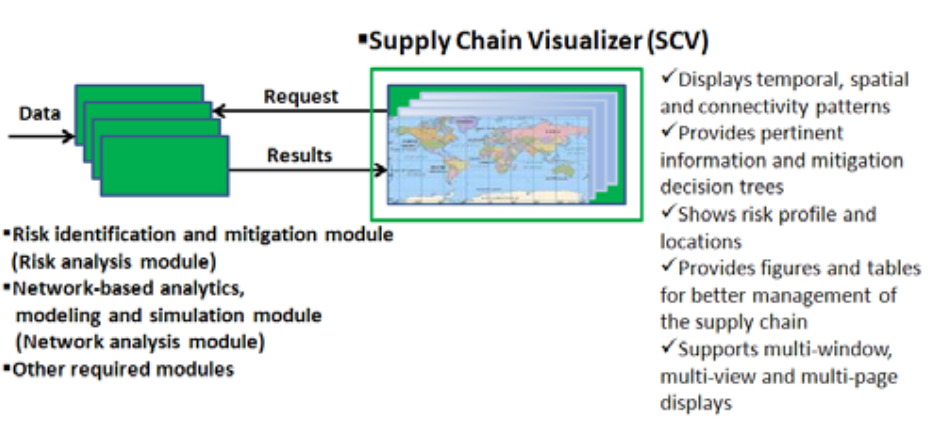

In [10]:
Image(filename = "risk01.png", width=800, height=500)

<font size="2">*source: "RiskVis:Supply Chain Visualization with Risk Management and Real-time Monitoring", 2013 IEEE International Conference on Automation Science and Engineering (CASE)*</font>

### 2.1.2 Source map for Supply Chain Managment

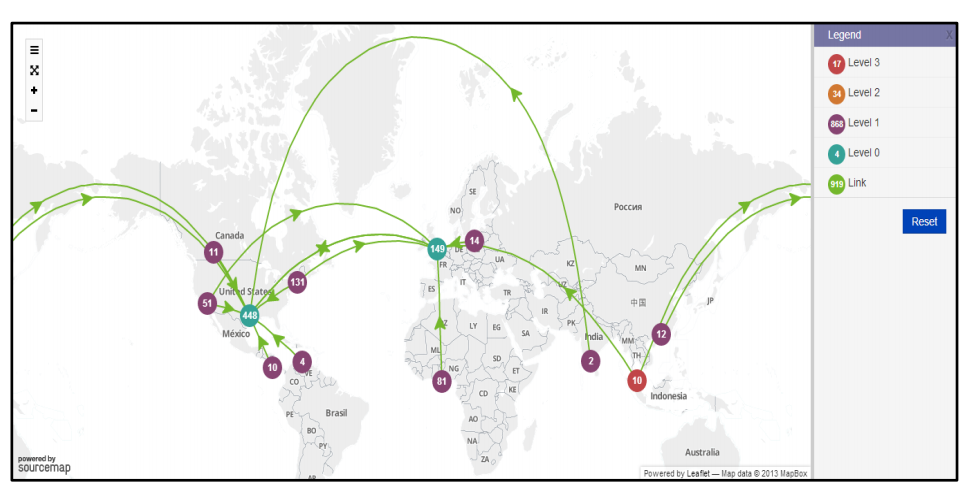

In [12]:
Image(filename = "risk02.png", width=700, height=500)

<font size="1"> *source: "Visualizing and Quantifying Global Supply Chain Risk", Ranjana Mary Ninan and Christopher Sean Wang* </font>

<font size="2">Management can filter by a number of categories associated with the nodes. Sourcemap also allows users to see a tree-structure of the BOM in order to find out Tier I and Tier II suppliers, as well as which suppliers belong to which products.</font>

### 2.1.3 Heat Map for REI and VARI Risk Visualization

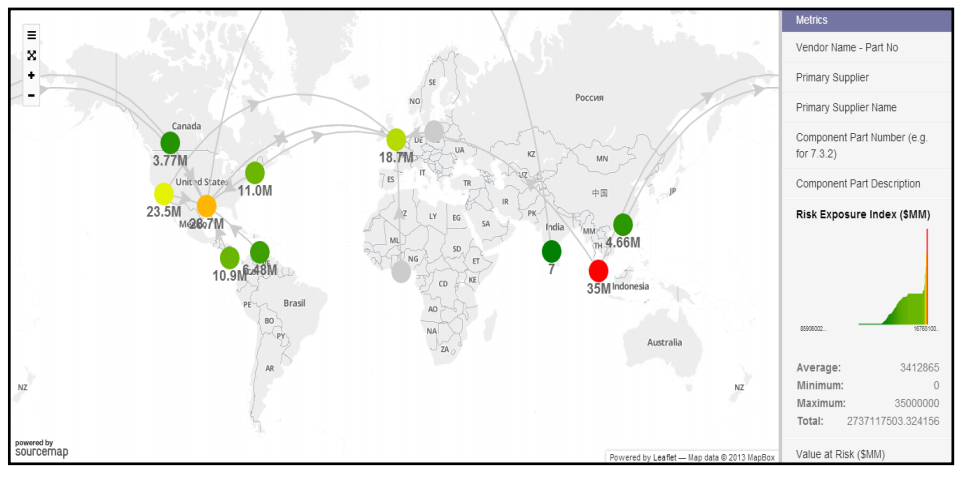

In [13]:
Image(filename = "risk03.png", width=700, height=600)

<font size="1">*source: "Visualizing and Quantifying Global Supply Chain Risk", Ranjana Mary Ninan and Christopher Sean Wang*</font>

<font size="2">Heatmap enables the user to compare nodes based on their relative importance. Each node is color-coded by their respective REI. High REIs are highlighted in red, while low REIs are highlighted in green</font>

## 2.2 Question to be discussed 

> Supply chain visualization converts the vast amounts of data available across multiple supply chain solutions into easily read dashboards and metrics displayed in real time that executives and supply chain planners can use to gauge the health of their supply networks


  * **What are a few of the ways that supply chain visualization can help day-to-day operations?**
      a. Proactive Customer Service
      b. Sourcing
      c. etc
      
      
  * **What are the external data and information provider to build the dashboard**
  
 
  * **Which other areas do data visualization could improve efficiency in the insurance industry**


<span style="font-family:Papyrus; font-size:2em;">Thanks!</span>


<span style="font-family:Papyrus; font-size:1em;">click 'esc' to navigate between slides</span>